# Image Processing
In this notebook we are going to explore how images are "seen" by a computer as multi-dimensional arrays. We will explore both grayscale images as well as color images, before also showing how the array representation allows for simple image transformations (eg. cropping, flipping, color-to-grayscale)

## 0. Importing Packages and a Closer Look at Numpy
When programming, we often import packages of code (often that someone else wrote) instead of having to write everything by ourselves. These packages allow us to re-use code instead of having to write every little bit of functionality we need ourselves. 

-**numpy: ** common tool for handling multi-dimensional arrays, containing many useful mathematical functions (we are going to take a look at this a little)

-**matplotlib: ** tools for creating graphs/plots (don't worry so much about how to use this one)

In [2]:
# Importing packages
import numpy as np 
from matplotlib import pyplot as plt
from scipy.ndimage import imread
%matplotlib inline

# These just change settings for output display, can just ignore
np.set_printoptions(edgeitems=7)
np.core.arrayprint._line_width = 160

### Numpy Practice: Regular Arrays vs.  Numpy Arrays

Here we briefly compare and contrast regular arrays with python arrays, showcasing how numpy arrays can be very useful.

**Basic Functionalities for 1D Arrays:** We begin by looking at basic operations. Notice that while we must create numpy arrays differently from regular python arrays, accessing and altering elements in a numpy array is done in the exact same way. 

In [3]:
# Initializing/Creating a regular python array vs. a numpy array
reg_array = [1,2,3] 
np_array = np.array([1,2,3]) # One way to create a numpy array is to put a regular array into a call to np.array()

print("Initialization: ")
print("Regular Array: ", reg_array)
print("Numpy Array: ", np_array, "\n") 

Initialization: 
Regular Array:  [1, 2, 3]
Numpy Array:  [1 2 3] 



In [4]:
# Getting information about length/sizes: Notice how numpy arrays store shapes in a tuple
print("Getting Sizes: ")
print("Regular Array LEN: ", len(reg_array))
print("Numpy Array SHAPE: ", np_array.shape, "\n")

Getting Sizes: 
Regular Array LEN:  3
Numpy Array SHAPE:  (3,) 



In [5]:
# Accessing elements
print("Accessing the 2nd Element")
print("2nd Element of Regular Array: ", reg_array[1])
print("2nd Element of Numpy Array: ", np_array[1], "\n")

# Altering elements
reg_array[1] = 5
np_array[1] = 6

print("Accessing the edited 2nd Element")
print("2nd Element of Regular Array: ", reg_array)
print("2nd Element of Numpy Array: ", np_array)

Accessing the 2nd Element
2nd Element of Regular Array:  2
2nd Element of Numpy Array:  2 

Accessing the edited 2nd Element
2nd Element of Regular Array:  [1, 5, 3]
2nd Element of Numpy Array:  [1 6 3]


** Multi-Dimensional Arrays: ** Numpy arrays really shine when we want to use arrays which are multi-dimensional. Regular python arrays can also be multi-dimensional but numpy arrays allow us to do many convenient things that are not directly possible with the python versions.

In [6]:
# Initializing a regular python array vs. a numpy array. We can get a multi-dimensional array by NESTING arrays 
reg_array = [[1,2,3],[4,5,6]]
np_array = np.array([[1,2,3],[4,5,6]])

print("Initialization: ")
print("Regular Array: ", reg_array)
print("Numpy Array: \n", np_array, "\n") 

# Getting lengths
print("Getting Sizes: ")
print("Regular Array LEN: ", len(reg_array))        # Notice this ignores the second dimension
print("Numpy Array SHAPE: ", np_array.shape, "\n")  # Notice how this prints out two numbers

# Accessing elements
print("Accessing the Element in 2nd row, 1st column:")
print("2nd Row, 1st Column of Regular Array: ", reg_array[1][0])     
print("2nd Row, 1st Column of Regular Array: ", np_array[1,0])         # We could also have done [1][0] technically

Initialization: 
Regular Array:  [[1, 2, 3], [4, 5, 6]]
Numpy Array: 
 [[1 2 3]
 [4 5 6]] 

Getting Sizes: 
Regular Array LEN:  2
Numpy Array SHAPE:  (2, 3) 

Accessing the Element in 2nd row, 1st column:
2nd Row, 1st Column of Regular Array:  4
2nd Row, 1st Column of Regular Array:  4


**The following are only possible in numpy arrays.** We can conveniently access the outermost dimension in nested arrays but numpy allows us to conveniently observe and manipulate a multi-dimensional array's inherent shape.

In [7]:
# Reshaping
print("Original: ")
print(np_array)

# Accessing whole rows
print("First row: ", np_array[0,:])       # The ":" means that we include all the elements along a dimension

# Accessing whole columns 
print("Second column: ", np_array[:,1])

# Reshaping
print("Reshaped to (3,2):")
print(np_array.reshape((6,1)))

Original: 
[[1 2 3]
 [4 5 6]]
First row:  [1 2 3]
Second column:  [2 5]
Reshaped to (3,2):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


** Useful Operations with Numpy Arrays: ** The second area where numpy really shines is that it contains useful functions/operations that operate on each element of a whole array. You cannot do any of these with regular arrays without writing them yourself with loops. 

In [8]:
np_array_1 = np.array([1,2,3])
np_array_2 = np.array([4,5,6])

In [9]:
# + occurs element wise (similarly works for -,*,/)
print("np_array_1 + np_array_2: ", np_array_1 + np_array_2)
print("np_array_1 - np_array_2: ", np_array_1 - np_array_2)

# power
print("x^2 for array_1: ", np.power(np_array_1, 2))

# e^x
print("e^x for array_1: ", np.exp(np_array_1))

# sin(x)
print("sin(x) for array_1: ", np.sin(np_array_1))

# reverse
print("Reverse of array_1: ", np.flip(np_array_1, axis=0))

np_array_1 + np_array_2:  [5 7 9]
np_array_1 - np_array_2:  [-3 -3 -3]
x^2 for array_1:  [1 4 9]
e^x for array_1:  [  2.71828183   7.3890561   20.08553692]
sin(x) for array_1:  [ 0.84147098  0.90929743  0.14112001]
Reverse of array_1:  [3 2 1]


## 1. Inspecting a Grayscale Image

Now let's get back to images. We begin by loading a grayscale image and inspecting the pixel values. As we see, though the original image is quite detailed, it is really represented by the computer as an array of many numbers. In such grayscale images, higher numbers correspond to a darker pixels in the image. By using the functions we have learned about in numpy, we see we can inspect how big this image is (64x64 pixels).

### Loading an image and observing its array representation

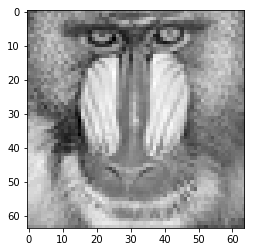

In [10]:
# Loads the file
baboon = np.genfromtxt('Images1/baboon.csv', delimiter=',') * 256   # This creates a numpy array! 

# Plots an image given the array of numbers
plt.imshow(baboon, cmap = 'gray')
plt.show()

In [11]:
# Print the pixel values
print("Pixel Values")
print(baboon, "\n")
print("Size of image array: " , baboon.shape)

# Print specific pixel value 
print("Pixel in 5th row and 10th column:", baboon[5,10], "\n")

Pixel Values
[[  82.   84.   77.  115.  115.  141.  115. ...,  141.  147.  150.  135.  150.  112.  104.]
 [  78.  108.  123.  134.  125.  129.  156. ...,  159.  159.  158.  127.  148.  129.  108.]
 [  70.   80.  118.  139.  147.  139.  152. ...,  138.  149.  162.  138.  124.  125.  128.]
 [  81.  106.  111.  129.  135.  157.  134. ...,  176.  159.  151.  163.  155.  119.  100.]
 [  89.  106.  132.  141.  128.  152.  155. ...,  154.  157.  158.  124.  139.  121.  125.]
 [ 107.   93.  119.  119.  140.  160.  135. ...,  146.  162.  180.  136.  132.  135.  110.]
 [ 103.  108.  125.  146.  152.  134.  133. ...,  158.  154.  150.  158.  122.  135.  119.]
 ..., 
 [ 161.  159.  167.  155.  162.  168.  150. ...,  116.  115.  127.  124.  134.  132.  123.]
 [ 157.  162.  162.  155.  159.  159.  150. ...,  118.  114.  125.  117.  129.  130.  117.]
 [ 162.  156.  156.  151.  158.  156.  158. ...,  116.  111.  127.  130.  115.  121.  126.]
 [ 151.  149.  148.  149.  158.  160.  164. ...,  119.  114.

### Cropping a portion of the picture

Since the image is just an array of numbers, we observe we can crop the image by selecting a subset of this array. We pick a smaller 15x15 cut-out of one of the eyes and can observe each individual pixel.

Array View: 
[[ 152.  135.  116.  116.  116.  127.  115.  132.  140.  126.  113.  103.  109.  107.  115.]
 [ 132.  135.  120.  120.  113.  116.   84.  121.  115.   77.   75.   94.   89.   86.   79.]
 [ 132.  132.  119.  117.  114.   96.   89.   82.   83.  106.  120.   99.   88.   84.   95.]
 [ 111.   95.  116.  118.  111.   96.  107.   97.   76.   95.  107.  122.  134.  154.  151.]
 [  75.   72.   72.   75.   64.   68.   69.   73.   67.   62.   60.   77.  116.  119.  111.]
 [  63.   66.   58.   62.   52.   51.   48.   52.   54.   53.   53.   61.   70.   74.   72.]
 [  68.   70.   57.   42.   83.   97.   83.   78.   82.   68.   78.   67.   44.   50.   57.]
 [  85.   90.   79.   61.  122.  135.   80.   81.  125.  112.   50.  118.   77.   40.   58.]
 [ 114.  145.  110.   40.   87.  133.  142.  136.  130.   71.   22.   88.  107.   46.   41.]
 [ 120.  151.  118.   65.   44.   59.   83.   86.   47.   25.   64.   81.  108.   82.   42.]
 [ 117.  119.  136.  120.   96.   55.   52.   53.   58.  

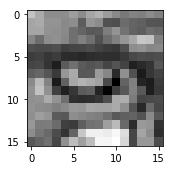

In [12]:
plt.figure(figsize=(2.5,2.5)) # This controls the size of the display (you can ignore this)

print("Array View: ")
eye = baboon[0:15,15:30] 
print(eye)

print("\nImage View: ")
plt.imshow(baboon[0:16,15:31], cmap = 'gray') 

### Exercise 1.1: Can you select a 15x15 grid containing the other eye? Print the pixel values and show the image.
Hint: Define a variable called `image_array` and set it equal to a crop of `baboon`. Playaround with the rows and columns selected and use `plt.imshow(image_array, cmap = 'gray')` to display the image corresponding to a specific crop.

## 2. Inspecting a Color Image 
A color image is simlilar to a gray scale image except each pixel is now represented by **3 values ** instead of 1. These three values correspond to **Red/Blue/Green channels** respectively.

### Color Channels

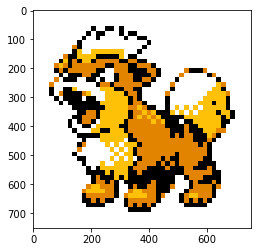

In [13]:
growlithe = imread("Images1/growlithe.jpg")[200:951, 200:951]
plt.imshow(growlithe)

In [14]:
# Print specific pixel value 
print("Size of the image array: ", growlithe.shape)
print("Pixel in 5th row and 10th column:", growlithe[200,200], "\n") # As we can see, the output is a triplet of values

Size of the image array:  (751, 751, 3)
Pixel in 5th row and 10th column: [226 132   0] 



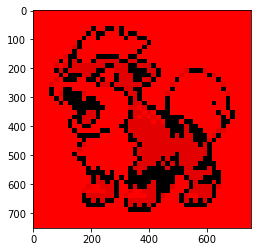

In [15]:
# First Channel Corresponds to "Redness"
growlithe_red = np.copy(growlithe)
growlithe_red[:,:,(1,2)] = np.zeros_like(growlithe_red[:,:,0:2])    # Zero out the 2nd and third channel
plt.imshow(growlithe_red)

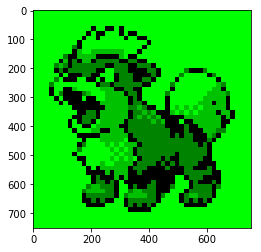

In [16]:
# Second Channel Corresponds to "Green"
growlithe_green = np.copy(growlithe)
growlithe_green[:,:,(0,2)] = np.zeros_like(growlithe_green[:,:,0:2])
plt.imshow(growlithe_green)

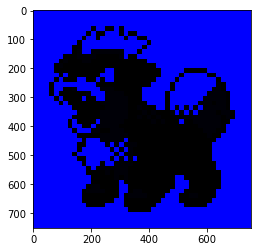

In [17]:
# Third Channel Corresponds to "Blueness"
growlithe_blue = np.copy(growlithe)
growlithe_blue[:,:,(0,1)] = np.zeros_like(growlithe_blue[:,:,0:2])
plt.imshow(growlithe_blue)

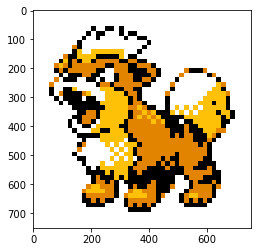

In [18]:
# Here we show that by adding all the channels together, we get the original image
plt.imshow(growlithe_red + growlithe_green + growlithe_blue)

### Exercise 1.2: Display 3 versions of the image, each with one of the color channels removed (eg. Only Red + Green, Only Red + Blue, Only Blue + Green). 

### Negative Image:
How do you think a negative image would be created? Keep in mind all pixel values still need to fall within the same 0-255 range. 

-Hint 1: The darker the pixel, the lighter it should be in the negative image. The lighter the pixel, the darker it should be

-Hint 2: Using any of "+,-,*,/" to combine a single number with a numpy array performs that operation element-wise (eg. `5 + np.array([1,2,3]) = np.array([6,7,8])`

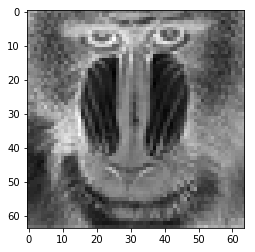

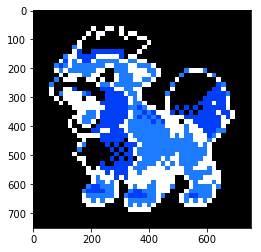

In [19]:
negative_baboon = 255 - baboon              
plt.imshow(negative_baboon, cmap = 'gray')
plt.show()

negative_growlithe = 255 - baboon
plt.imshow(255 - growlithe)
plt.show()

### Converting Color to Grayscale

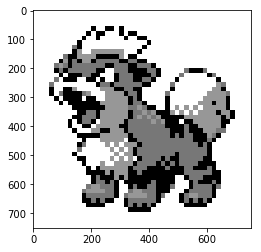

In [20]:
growlithe_grayscale = np.mean(growlithe, axis = 2)
plt.imshow(growlithe_grayscale, cmap = 'gray')
plt.show()

### Horizontal Flip

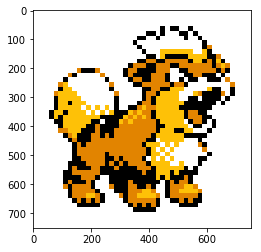

In [21]:
plt.imshow(np.flip(growlithe,axis=1))

### Exercise 1.3: Vertical Flip
Can you figure out how to do a vertical flip (this should be really easy if you know how to do horizontal)?